Workplace Scenario
A certain casino has contracted your team to determine if there are any patterns among their tables and patron attendance. They are not asking for prediction, just for a description of what is already there.

Now that we have studied different plot types and their usefulness in determining what is available in the data. Use the Jitter Head Count data set to find and report on interesting relationships in the data.

Jittered Head Count information:
GameCode: 2 digit game code. 
BA: Baccarat
C4: Blackjack variant
CR: Craps
DH: Blackjack variant
FP: Four Card Poker
LI: Let it Ride
MI: Omaha Hi-Low
MQ:  Blackjack variant
MR: Mini-Baccarat
MS: Mississippi Stud
ND: Blackjack variant
PA: Pai Gow Tiles
PG: Pai Gow
RO: Roulette
RR: Electronic Roulette
S6: Big Six
SH: Blackjack variant
TH: Blackjack variant
TL: Blackjack variant
TP: Texas Hold'em Poker
UT: Ultimate Texas Hold'em
WR: Casino War
DateFormat: Date
Hour: 0-23 of the day
TabelsOcc:  Number of Tables Occupied in the casino
TablesOpen: Number of tables open in the casino. This number can be different than occupied because the pit boss can open a table and no one can be sitting at it.
Tables Closed: Number of tables closed in the casino.
HeadCount: Total Count of people at the hour, day, and table type
DayOfWeek: 1-7.  1 = Sunday, 7 = Saturday.
DayNumber 1-366:  Day of year.  Not really needed, but note that the dates start in September.
 

Instructions
Using the Jitter Head Count data set, create a new notebook or use Studentname-M01-Vizualization.ipynb to find and report on interesting relationships in the data as follows:

Create different complementary views of data by applying multiple chart types and aesthetics.
Project multiple dimensions using conditioning or faceting (e.g. small multiples) on both categorical and numeric variables.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
#import csv
casino = pd.read_csv('JitteredHeadCount.csv')
casino.loc[:, 'date'] = pd.to_datetime(casino.loc[:, 'DateFormat'])
casino.set_index('DateFormat', inplace = True)

In [98]:
casino.head()

,GameCode,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber,date
DateFormat,,,,,,,,,
9/16/2011,BA,6,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,7,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,8,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,9,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,10,0,1,0,0,6,47,2011-09-16


In [99]:
#understand the data
casino.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [100]:
#check data shape and types
print(casino.shape)
print(casino.dtypes)

(175677, 9)
GameCode                object
Hour                     int64
TablesOcc                int64
TablesOpen               int64
TablesClosed             int64
HeadCount                int64
DayOfWeek                int64
DayNumber                int64
date            datetime64[ns]
dtype: object


In [101]:
#print name of columns. This is helpful to quickly use column names
casino.columns

Index(['GameCode', 'Hour', 'TablesOcc', 'TablesOpen', 'TablesClosed',
       'HeadCount', 'DayOfWeek', 'DayNumber', 'date'],
      dtype='object')

In [102]:
#understand first 10 rows of data
casino.head(10)

,GameCode,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber,date
DateFormat,,,,,,,,,
9/16/2011,BA,6,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,7,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,8,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,9,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,10,0,1,0,0,6,47,2011-09-16
9/16/2011,BA,11,0,1,0,0,6,47,2011-09-16
9/16/2011,BA,12,0,1,0,0,6,47,2011-09-16
9/16/2011,BA,13,0,1,0,0,6,47,2011-09-16
9/16/2011,BA,14,0,1,0,0,6,47,2011-09-16


In [36]:
# pd.plotting.scatter_matrix(casino, figsize=(15, 15))
# plt.show()

**Time series**

In [37]:
# ax = plt.figure(figsize=(8, 6)).gca() # define axis
# casino.plot(ax = ax)
# ax.set_xlabel('DateFormat')
# ax.set_ylabel('Number of sunspots')
# ax.set_title('Time series of sunspots')

**Open vs. Occupied** - consider size 

Text(0,0.5,'Tables Occupied')

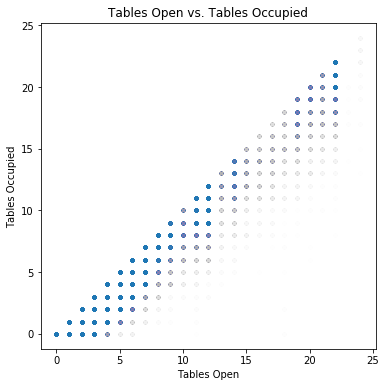

In [38]:
ax = plt.figure(figsize=(6,6)).gca()
casino.plot.scatter(x = 'TablesOpen', y = 'TablesOcc', ax = ax, alpha = 0.003)
ax.set_title('Tables Open vs. Tables Occupied')
ax.set_xlabel('Tables Open')
ax.set_ylabel('Tables Occupied')

Text(0.5,1,'Time series of sunspots')

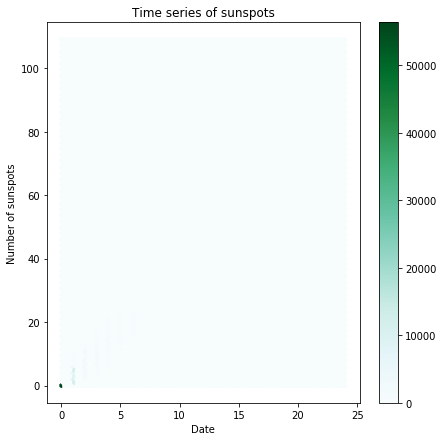

In [39]:
ax = plt.figure(figsize=(7, 7)).gca() # define axis
casino.plot.hexbin(x = 'TablesOcc', y = 'HeadCount', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')

**Tables open, occupied over time**

**Tables Occ vs. Headcount**

Text(0,0.5,'Headcount')

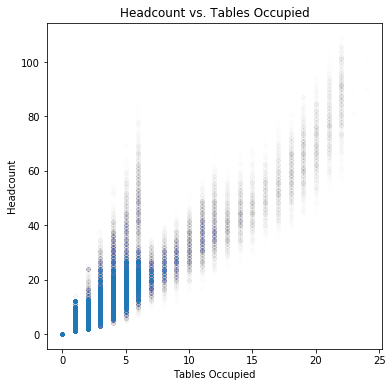

In [57]:
ax = plt.figure(figsize=(6,6)).gca()
casino.plot.scatter(x = 'TablesOcc', y = 'HeadCount', ax = ax, alpha = 0.002)
ax.set_title('Headcount vs. Tables Occupied')
ax.set_xlabel('Tables Occupied')
ax.set_ylabel('Headcount')

In [ ]:
import seaborn as sns
ax = sns.kdeplot(auto_price.loc[:, ['city-mpg', 'price']], shade = True, cmap = 'PuBu')
auto_price.plot.scatter(x = 'city-mpg', y = 'price', ax = ax)
ax.set_title('Auto price vs city MPG') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_xlabel('City MPG')

**Headcount vs. Hour**

In [41]:
casino['counts'] = 1

Text(0,0.5,'Headcount')

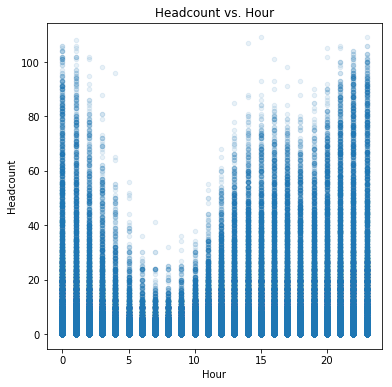

In [42]:
ax = plt.figure(figsize=(6,6)).gca()
casino.plot.scatter(x = 'Hour', y = 'HeadCount', ax = ax, alpha = .1)
ax.set_title('Headcount vs. Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Headcount')

Text(0,0.5,'Headcount')

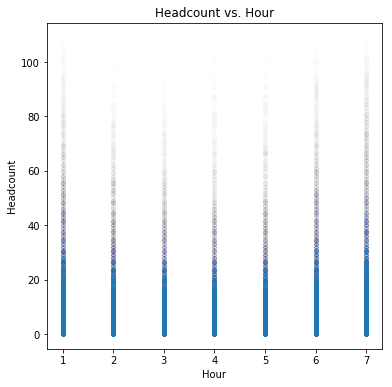

In [94]:
ax = plt.figure(figsize=(6,6)).gca()
casino.plot.scatter(x = 'DayOfWeek', y = 'HeadCount', ax = ax, alpha = .005)
ax.set_title('Headcount vs. Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Headcount')

**headcount by gametype**

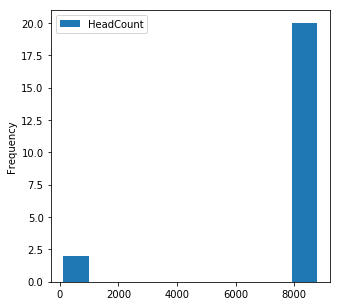

In [43]:
ax = plt.figure(figsize=(5, 5)).gca() # define axis
casino.loc[:, ['GameCode', 'HeadCount']].groupby(['GameCode']).agg('count').plot.hist(ax = ax)

**headcount by day of week**

Text(0.5,1,'Time series of sunspots')

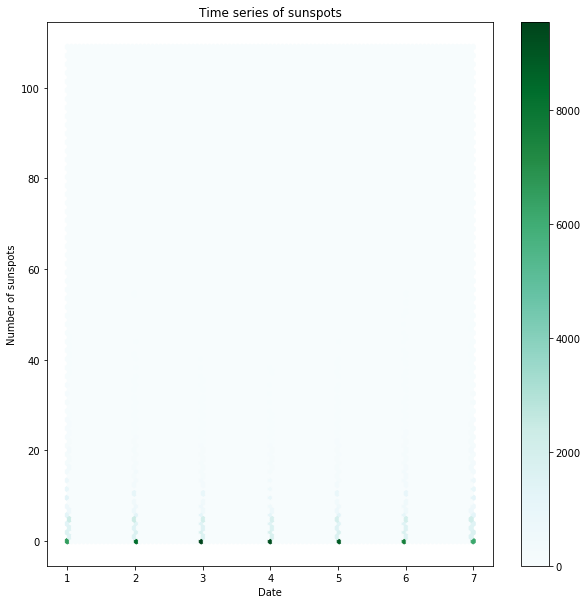

In [90]:
ax = plt.figure(figsize=(10, 10)).gca() # define axis
casino.plot.hexbin(x = 'DayOfWeek', y = 'HeadCount', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')

**headcount, tablesopen, game** - where are people playing? - consider add shape, size

In [45]:
import seaborn as sns

Text(0.5,1,'Auto Price vs. City MPG \n with fuel type by color')

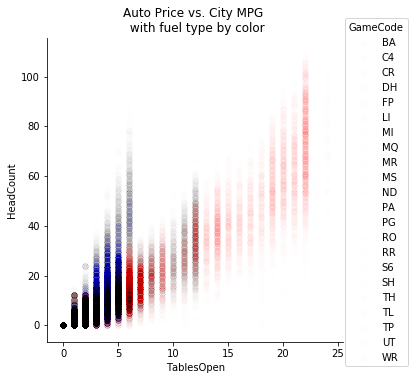

In [59]:
sns.lmplot(x = 'TablesOpen', y = 'HeadCount', 
       data = casino, 
       hue = "GameCode", 
       palette="seismic", 
       scatter_kws={'alpha':0.003},
       fit_reg = False)
plt.xlabel('TablesOpen')
plt.ylabel('HeadCount')
plt.title('Auto Price vs. City MPG \n with fuel type by color')

**Tables open by hour** - does this align to headcount?

Text(0.5,1,'Time series of sunspots')

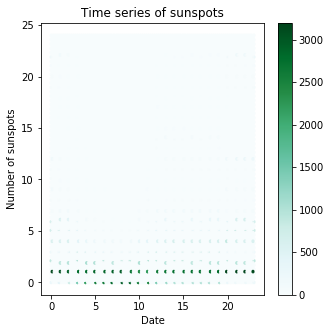

In [47]:
ax = plt.figure(figsize=(5, 5)).gca() # define axis
casino.plot.hexbin(x = 'Hour', y = 'TablesOpen', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')

In [49]:
num_cols = ["GameCode"] 
sns.pairplot(casino.loc[:, num_cols], hue='GameCode', 
             palette="seismic", diag_kind="kde", 
             size=2).map_upper(sns.kdeplot, cmap="Blues")

IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 0x0 with 0 Axes>

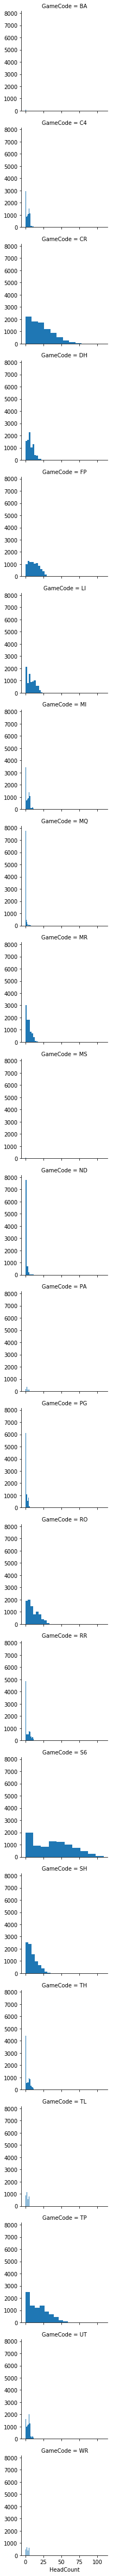

In [52]:
g = sns.FacetGrid(casino, row='GameCode')
g = g.map(plt.hist, "HeadCount")

In [ ]:
#Table Occupany by table type and time - Usage

In [ ]:
#Busiest table types - count - facet plot?

In [ ]:
#If tables are open, are they occupied - 

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


KeyboardInterrupt: 

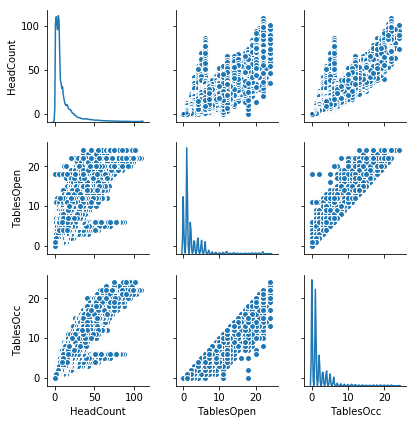

In [60]:
num_cols = ["HeadCount", "TablesOpen", "TablesOcc"] 
sns.pairplot(casino.loc[:, num_cols],palette="seismic", diag_kind="kde", 
             size=2).map_upper(sns.kdeplot, cmap="Blues")

In [87]:
casino.loc[:, 'HeadCount_bin'] = pd.cut(casino.loc[:, 'HeadCount'], bins = 10, labels = range(10))
casino.loc[:, 'HeadCount_bin'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: HeadCount_bin, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [88]:
gamecode_headcount = pd.crosstab(casino.loc[:, 'HeadCount_bin'], casino.loc[:, 'GameCode'])
num_cars = gamecode_headcount.apply(sum, axis = 0)
gamecode_headcount = gamecode_headcount.div(num_cars, axis = 1)
print(gamecode_headcount.head(10))

GameCode             BA        C4        CR        DH        FP        LI  \
HeadCount_bin                                                               
0              0.974576  0.995671  0.298929  0.807929  0.483140  0.669970   
1              0.025424  0.004329  0.247892  0.189907  0.411597  0.323878   
4              0.000000  0.000000  0.216792  0.002165  0.105263  0.006152   
5              0.000000  0.000000  0.130326  0.000000  0.000000  0.000000   
2              0.000000  0.000000  0.066986  0.000000  0.000000  0.000000   
3              0.000000  0.000000  0.029506  0.000000  0.000000  0.000000   
7              0.000000  0.000000  0.007861  0.000000  0.000000  0.000000   
6              0.000000  0.000000  0.001709  0.000000  0.000000  0.000000   
8              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9              0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

GameCode             MI   MQ        MR        MS ...         PG        RO  

Text(0.5,1,'HeadCount ranges of Gamecode')

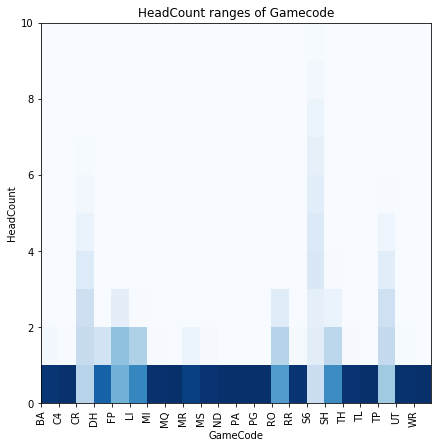

In [95]:
ax = plt.figure(figsize=(7, 7)).gca() # define axis
ax.pcolor(gamecode_headcount, cmap = 'Blues')
ax.set_xticks(range(gamecode_headcount.shape[1]))
ax.set_xticklabels(gamecode_headcount.columns, rotation=90)
ax.set_xlabel('GameCode')
ax.set_ylabel('HeadCount')
ax.set_title('HeadCount ranges of Gamecode')